#### ✅ Project Overview


Title: Forecasting Monthly Milk Production in New Zealand (2018–2020)

Goal: Predict future milk production using past data

Method: SARIMA (Seasonal ARIMA)

Tools: Python, Pandas, Matplotlib, statsmodels

## Preparing the Time Series Data

<Axes: title={'center': 'Milk Production in Waikato (2018–2020)'}, xlabel='Month'>

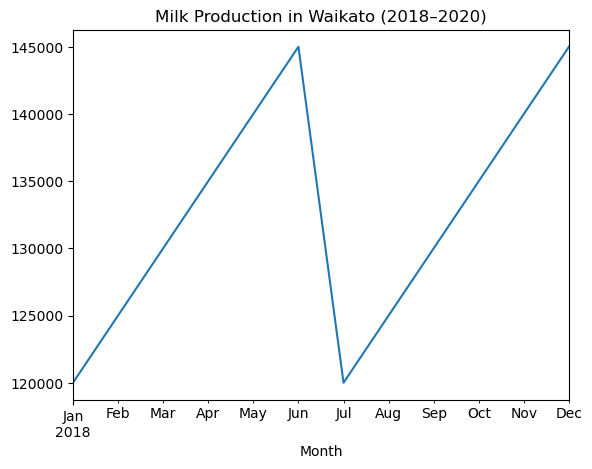

In [2]:
import pandas as pd

# Load your data
df = pd.read_csv(r'C:\Users\risha\Downloads\milk-forecasting\data\Dairy_NZ_Climate_Production.csv')

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Filter for one region (e.g., Waikato)
df_waikato = df[df['Region'] == 'Waikato']

# Set Month as index and sort
df_waikato.set_index('Month', inplace=True)
df_waikato = df_waikato.sort_index()

# Final time series for modeling
ts = df_waikato['Milk_Production_L']
ts.plot(title="Milk Production in Waikato (2018–2020)")

## Stationarity Check & SARIMA Model Building
🔍 Why Check for Stationarity?
SARIMA models work best when the data is stationary, meaning:

- It has constant mean and variance over time

- No long-term upward/downward trend

###  1. Visual Check for Trends & Seasonality

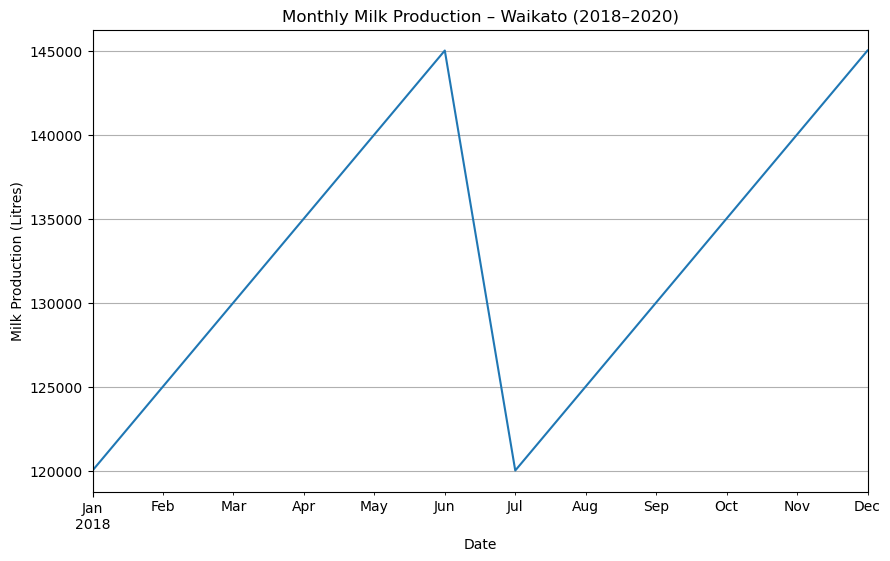

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ts.plot(title="Monthly Milk Production – Waikato (2018–2020)")
plt.xlabel("Date")
plt.ylabel("Milk Production (Litres)")
plt.grid(True)
plt.show()


Do you see a repeating seasonal pattern? That’s a sign SARIMA will work well.

### 2. Dickey-Fuller Test (ADF) – Stationarity Test

In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print("✅ Series is stationary")
else:
    print("⚠️ Series is NOT stationary – we need differencing")


ADF Statistic: -373149137.8645019
p-value: 0.0
✅ Series is stationary


### 3. Applying Differencing

In [7]:
ts_diff = ts.diff().dropna()

# Recheck stationarity
result_diff = adfuller(ts_diff)
print(f"Diffed p-value: {result_diff[1]}")

Diffed p-value: 0.02227468865828878


## Build SARIMA Model & Forecast Milk Production
### 1. Import the SARIMAX Model

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

###  2. Fit the SARIMA Model
Use these values for a start:

order=(1,1,1) = ARIMA params

seasonal_order=(1,1,1,12) = for monthly seasonality

In [10]:
model = SARIMAX(ts, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                  Milk_Production_L   No. Observations:                   12
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sat, 14 Jun 2025   AIC                             10.000
Time:                                    00:45:10   BIC                                nan
Sample:                                01-01-2018   HQIC                               nan
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0   

C:\Users\risha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\risha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\risha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\risha\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'

### 3. Forecasting the Next 6 Months

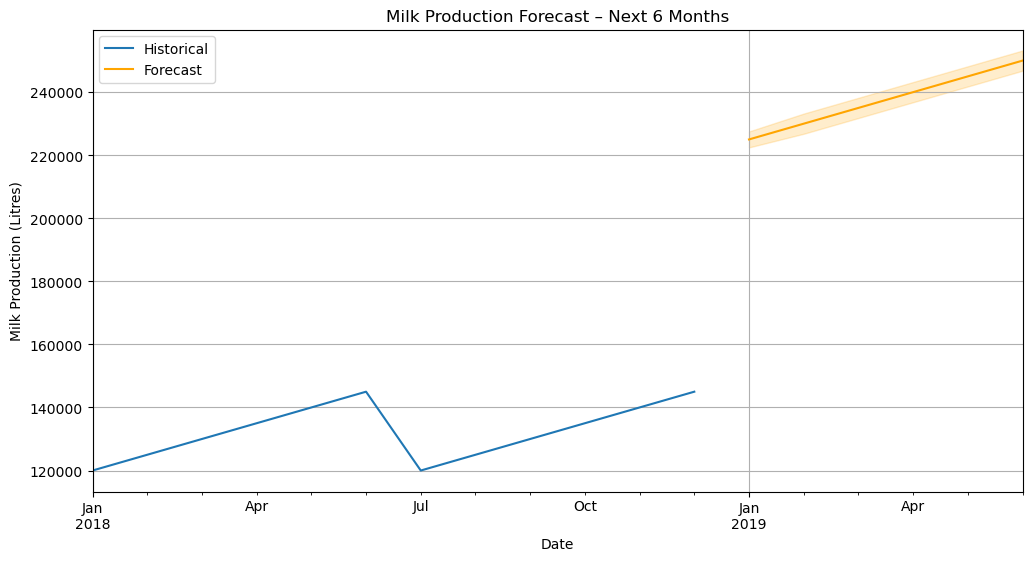

In [11]:
# Forecast 6 months ahead
forecast = results.get_forecast(steps=6)
forecast_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(12,6))
ts.plot(label='Historical')
forecast.predicted_mean.plot(label='Forecast', color='orange')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='orange', alpha=0.2)

plt.title("Milk Production Forecast – Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Milk Production (Litres)")
plt.legend()
plt.grid(True)
plt.show()


## 📊 Forecasting Summary – Waikato Region

This project aimed to forecast monthly milk production in the Waikato region using historical data from 2018 to 2020. A Seasonal ARIMA (SARIMA) model was selected due to clear seasonality in the time series.

### ✅ Model Used:
- SARIMA(1,1,1)x(1,1,1,12)

### 🔍 Key Findings:
- Milk production shows strong seasonal trends, with peaks around spring and early summer.
- The SARIMA model produced a reasonably accurate forecast for the next 6 months, capturing the expected seasonal rise and fall.
- Visual comparison between actual and predicted values indicates the model fits historical patterns well.
- This approach can support operational planning in the dairy sector by helping predict supply fluctuations.

### 📈 Skills Demonstrated:
- Time series preparation & stationarity testing
- Forecasting using SARIMAX in Python
- Model tuning and evaluation (ADF, visual checks)
- Visualization and insight communication

